# 4. Intro to Exploratory Data Analysis

In the last chapter, we learned about loading data into R and practiced selecting and summarizing columns and rows of the data. In this chapter, we will learn how to conduct more exploratory analysis focusing on the univariate and bivariate sample distributions. The first half focuses on using base R to create basic plots and summaries. In the second half, we show how to utilize create summary plots using the `GGally` package and tables using the `gt` and `gtsummary` packages.

In [1]:
library(RforHDSdata) # sample data
library(GGally) # pairwise plots
library(gt) # tables
library(gtsummary) # summary tables

Loading required package: ggplot2



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



#StandWithUkraine



## Univariate Distributions

We will use a samples of the National Health and Nutrition Examination Survey ([NHANES](https://www.cdc.gov/nchs/nhanes/index.htm)). The sample contains lead, blood pressure, BMI, smoking status, alcohol use, and demographic variables from NHANES 1999-2018, downloaded from the nhanesA package. There are 31,625 observations in this sample. Use the help operator `?NHANESsample` to read the variable descriptions.

In [2]:
data(NHANESsample)
dim(NHANESsample)
names(NHANESsample)

[1] 31265    21

[1] "ID"            "AGE"           "SEX"           "RACE"         
 [5] "EDUCATION"     "INCOME"        "SMOKE"         "YEAR"         
 [9] "LEAD"          "BMI_CAT"       "LEAD_QUANTILE" "HYP"          
[13] "ALC"           "DBP1"          "DBP2"          "DBP3"         
[17] "DBP4"          "SBP1"          "SBP2"          "SBP3"         
[21] "SBP4"

To start our exploration, we will look at whether there are any missing values. We use the `complete.cases()` function to observe that there are no complete cases. We also see that blood pressure measurements and alcohol use have the highest percentages of missing values. For simplicity, we chose to keep the first systolic and diastolic blood pressure measurements and do a complete case analysis using the `na.omit()` function to define our complete data frame `nhanes_df`. 

In [3]:
sum(complete.cases(NHANESsample))
apply(NHANESsample, 2, function(x) sum(is.na(x)))/nrow(NHANESsample)

[1] 0

ID           AGE           SEX          RACE     EDUCATION 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0006716776 
       INCOME         SMOKE          YEAR          LEAD       BMI_CAT 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
LEAD_QUANTILE           HYP           ALC          DBP1          DBP2 
 0.0000000000  0.0000000000  0.0268671038  0.0600351831  0.0639053254 
         DBP3          DBP4          SBP1          SBP2          SBP3 
 0.0709739325  0.8911242604  0.0600351831  0.0639053254  0.0709419479 
         SBP4 
 0.8911242604

In [4]:
sum(complete.cases(NHANESsample))
apply(NHANESsample, 2, function(x) sum(is.na(x)))/nrow(NHANESsample)

[1] 0

ID           AGE           SEX          RACE     EDUCATION 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0006716776 
       INCOME         SMOKE          YEAR          LEAD       BMI_CAT 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
LEAD_QUANTILE           HYP           ALC          DBP1          DBP2 
 0.0000000000  0.0000000000  0.0268671038  0.0600351831  0.0639053254 
         DBP3          DBP4          SBP1          SBP2          SBP3 
 0.0709739325  0.8911242604  0.0600351831  0.0639053254  0.0709419479 
         SBP4 
 0.8911242604

In [5]:
nhanes_df <- na.omit(subset(NHANESsample, select= -c(SBP2, SBP3, SBP4, DBP2, DBP3, DBP4)))

In the last chapter, we introduced the `table()` and `summary()` functions to quickly summarize categorical and quantitative vectors. 

In [6]:
table(nhanes_df$SMOKE)
summary(nhanes_df$YEAR)


NeverSmoke  QuitSmoke StillSmoke 
     13774       8019       6799 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1999    2003    2007    2008    2011    2017 

We decide to select the most recent observations for our analysis in this chapter. We use the `subset()` function to select these rows. 

In [7]:
nhanes_df <- subset(nhanes_df, nhanes_df$YEAR==2017)

As shown above, smoking status has been coded into three categories. We want to create a new variable to represent whether someone has ever smoked. To do so, we use the `ifelse()` function. This function allows us to create a new vector using some logic. The logic captured by this function is that we will take one value if we meet some condition(s) and we will use a second value otherwise. The first argument is a vector of TRUE/FALSE values representing the conditions, the next argument is the value to use if we meet the condition(s), and the last argument is the value to use otherwise. We use this function to create a new vector `EVER_SMOKE` that equals "Yes" for those who are either still smoking or quit smoking and "No" otherwise. 

In [8]:
nhanes_df$EVER_SMOKE <- ifelse(nhanes_df$SMOKE %in% c("QuitSmoke", "StillSmoke"), "Yes", "No")
table(nhanes_df$EVER_SMOKE)


  No  Yes 
1411 1173 

The `summary()` and `table()` functions allow us to summarize the univariate sample distributions of columns. We may also want to plot these distributions. We saw in the last chapter that the `hist()` function creates a histogram plot. Below we use this to plot a histogram of the log transformation of the lead column.

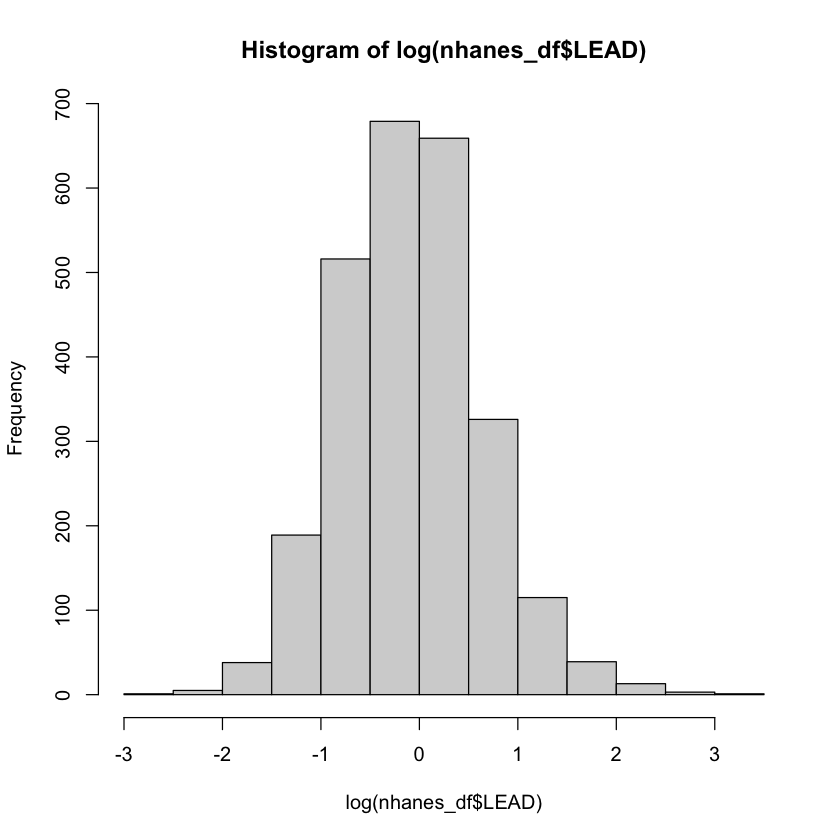

In [9]:
hist(log(nhanes_df$LEAD))

If we want to polish this figure, we can use some of the other optional arguments to the function (see `?hist` for the full list of arguments). For example, we may want to update the text `log(nhanes_df$lead)` in the title and x-axis. Below we update the [color](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf), labels, and number of bins for the plot. The argument `breaks` specifies the number of bins to use to create the histogram, `col` specifies the color, `main` specified the title of the plot, and `xlab` specifies the x-axis label (using `ylab` would specify the y-axis label). 

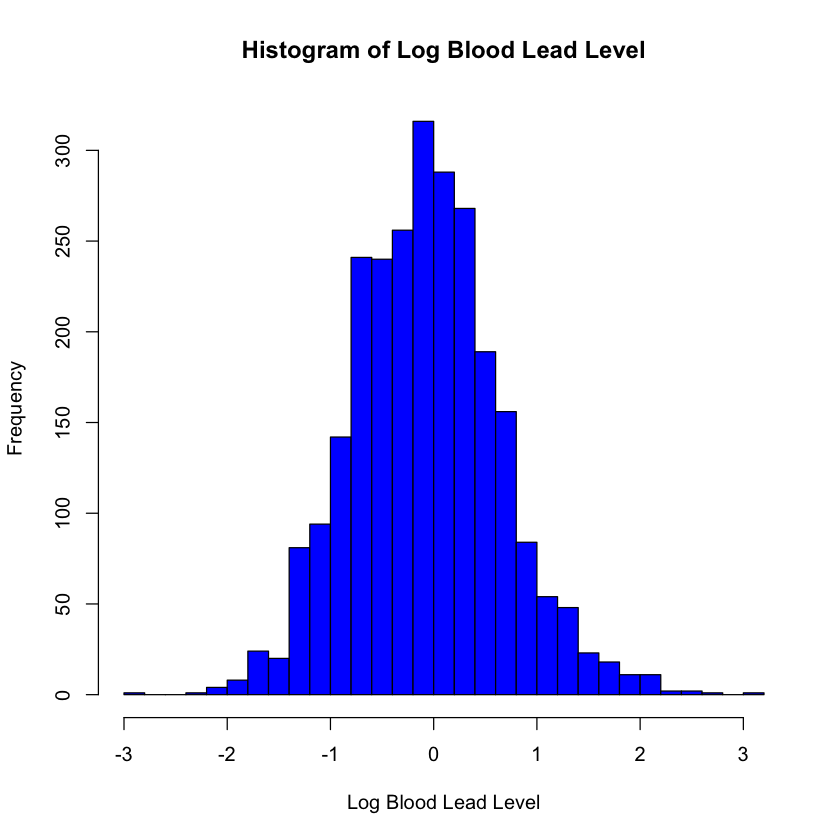

In [10]:
hist(log(nhanes_df$LEAD), breaks = 30, col="blue", main="Histogram of Log Blood Lead Level",
    xlab="Log Blood Lead Level")

For categorical variables, we may want to plot the counts in each category using a bar plot. The function `barplot()` asks us to specify the `names` and `heights` of the bars. To do so, we will need to store the counts for each category. Again, we update the color and labels.

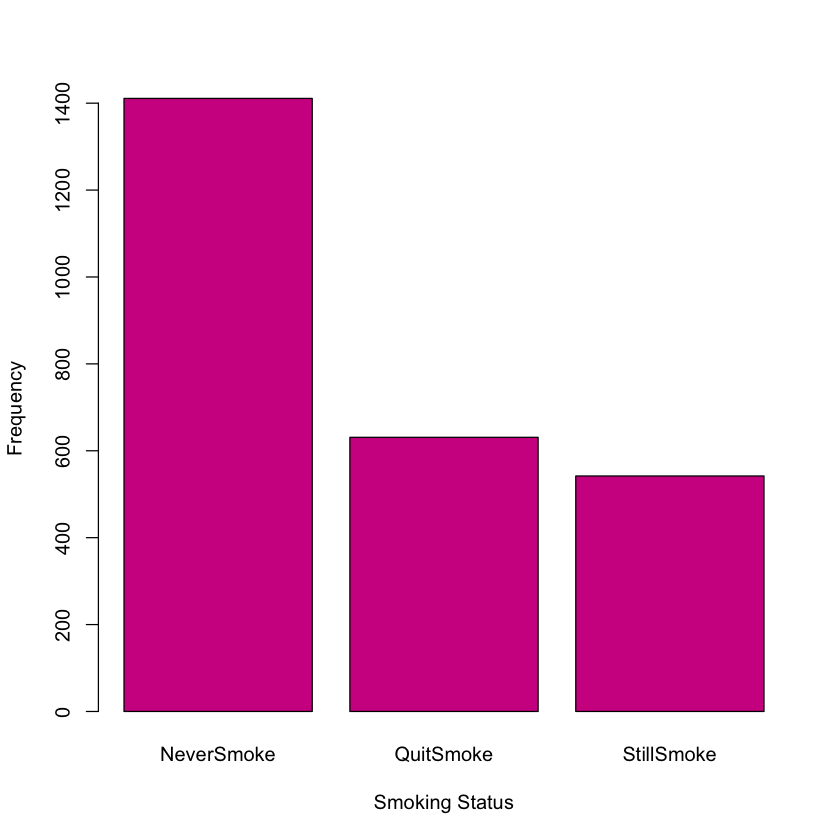

In [11]:
smoke_counts <- table(nhanes_df$SMOKE)
barplot(height=smoke_counts, names=names(smoke_counts), col="violetred",
       xlab="Smoking Status", ylab="Frequency")

With a bar plot, we can even specify a different color for each bar. To do so, `col` must be a vector of specified colors with the same length as the number of categories.

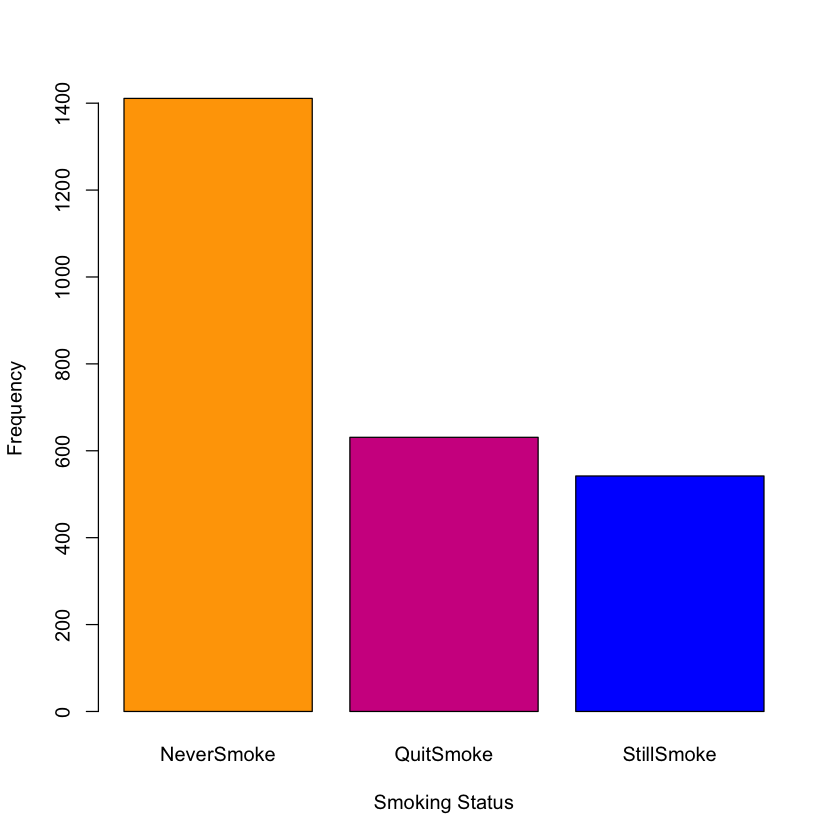

In [12]:
barplot(height=smoke_counts, names=names(smoke_counts), col=c("orange","violetred","blue"),
       xlab="Smoking Status", ylab="Frequency")

### Practice Question

## Bivariate Distributions

We now turn our attention to the relationship between multiple columns. When we have two categorical variables, we can use the `table()` function to find the counts across all combinations. Below, we look at the distribution in smoking status by sex. We observe that a higer percentage of female participants have never smoked. 

In [13]:
table(nhanes_df$SMOKE, nhanes_df$SEX)

            
             Male Female
  NeverSmoke  596    815
  QuitSmoke   390    241
  StillSmoke  324    218

To look at the sample distribution of a continuous variable stratified by a cateogrical variable, we could call the `summary()` function for each subset of the data. Below we look at the distribution of blood lead level by sex. 

In [14]:
summary(nhanes_df$LEAD[nhanes_df$SEX=="Female"])
summary(nhanes_df$LEAD[nhanes_df$SEX=="Male"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   0.470   0.770   0.977   1.208   8.670 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.050   0.700   1.090   1.461   1.660  22.010 

We could also observe this visually through a box plot. When given one categorical variable and one continuous variable, the `plot()` function creates a box plot. By default, the first argument is the x-axis variable and second argument is the y-axis variable. 

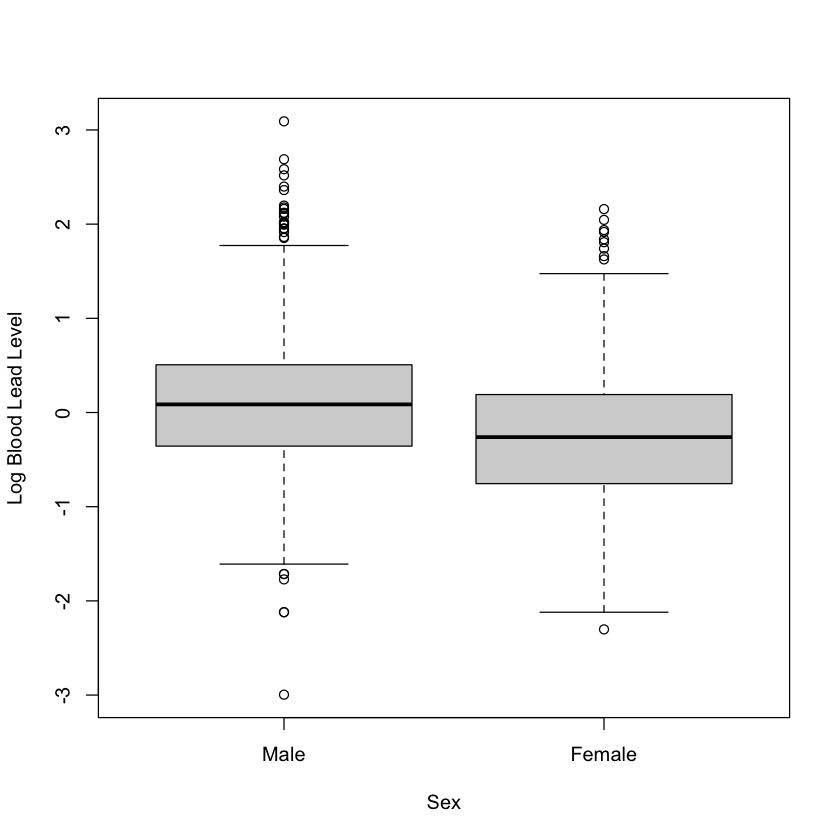

In [15]:
plot(nhanes_df$SEX, log(nhanes_df$LEAD), ylab="Log Blood Lead Level", xlab="Sex")

Alternatively, we could use the `boxplot()` which can be passed a formula to specify how to group the data. In the case below, we make our outcome the log value of blood lead level and we group by multiple columns, `SEX` and `EVER_SMOKE`, so our formula is `log(LEAD)~SEX+EVER_SMOKE`. The second argument to the function specifies the data.  We specify the column colors to show the link between the box plots shown. 

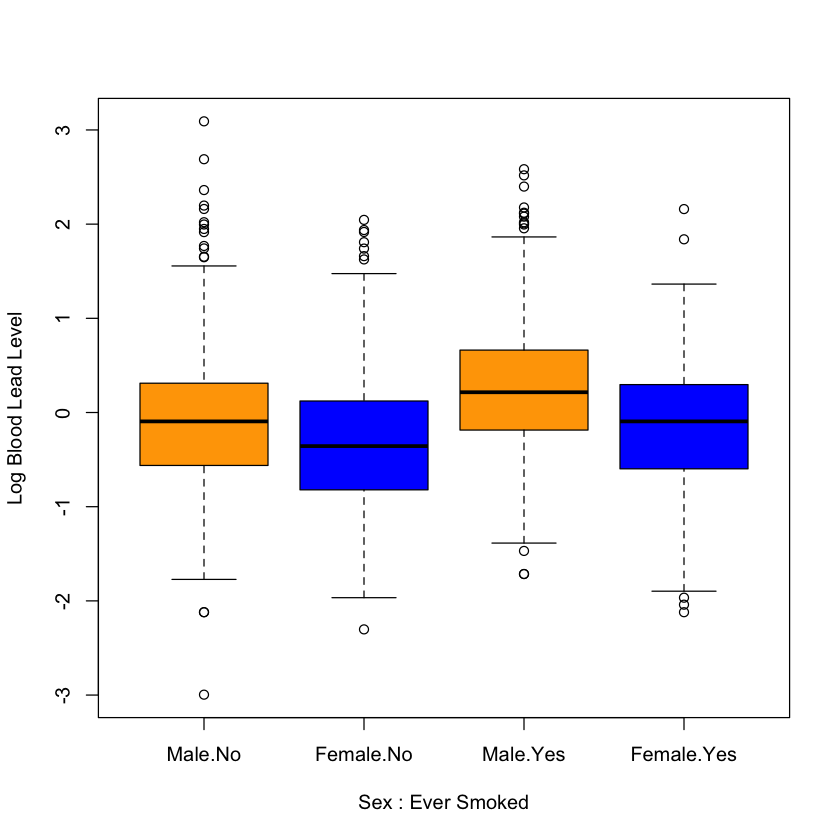

In [16]:
boxplot(log(LEAD)~SEX+EVER_SMOKE, data=nhanes_df, col=c("orange", "blue", "orange", "blue"),
       xlab="Sex : Ever Smoked", ylab = "Log Blood Lead Level")

To visualize the bivariate distribution between two continuous variables, we can use a scatter plot. To create a scatter plot, we use the `plot()` function again. We use this function to show the relationship between systolic and diastolic blood pressure. 

In [17]:
names(nhanes_df)

[1] "ID"            "AGE"           "SEX"           "RACE"         
 [5] "EDUCATION"     "INCOME"        "SMOKE"         "YEAR"         
 [9] "LEAD"          "BMI_CAT"       "LEAD_QUANTILE" "HYP"          
[13] "ALC"           "DBP1"          "SBP1"          "EVER_SMOKE"

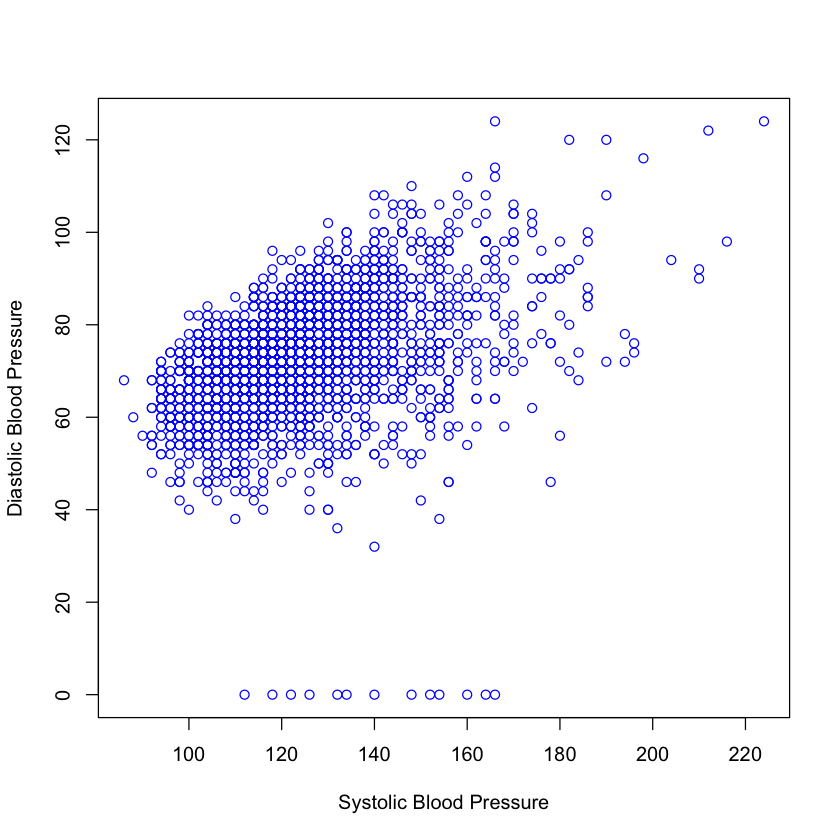

In [18]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col="blue", xlab="Systolic Blood Pressure",
    ylab="Diastolic Blood Pressure")

The two measures of blood pressure look highly correlated. We can calculate their Pearson and Spearman correlation using the `cor()` function. The default method is the Pearson correlation, but we can also specify to calculate the Kendall or Spearman correlation by specifying the method. 

In [19]:
cor(nhanes_df$SBP1, nhanes_df$DBP1)
cor(nhanes_df$SBP1, nhanes_df$DBP1, method="spearman")

[1] 0.4166796

[1] 0.4711908

We may also want to add some extra information to our plot above. This time instead of specifying the color manually, we use the column `hyp`, an indicator for hypertension, to specify the color. We have to make sure this vector is a factor for R to color by group. Additionally, we add a blue vertical and horizontal line using the `abline()` function to mark cutoffs for hypertension. Even though this function is called after `plot()`, the lines are automatically added to the current plot.

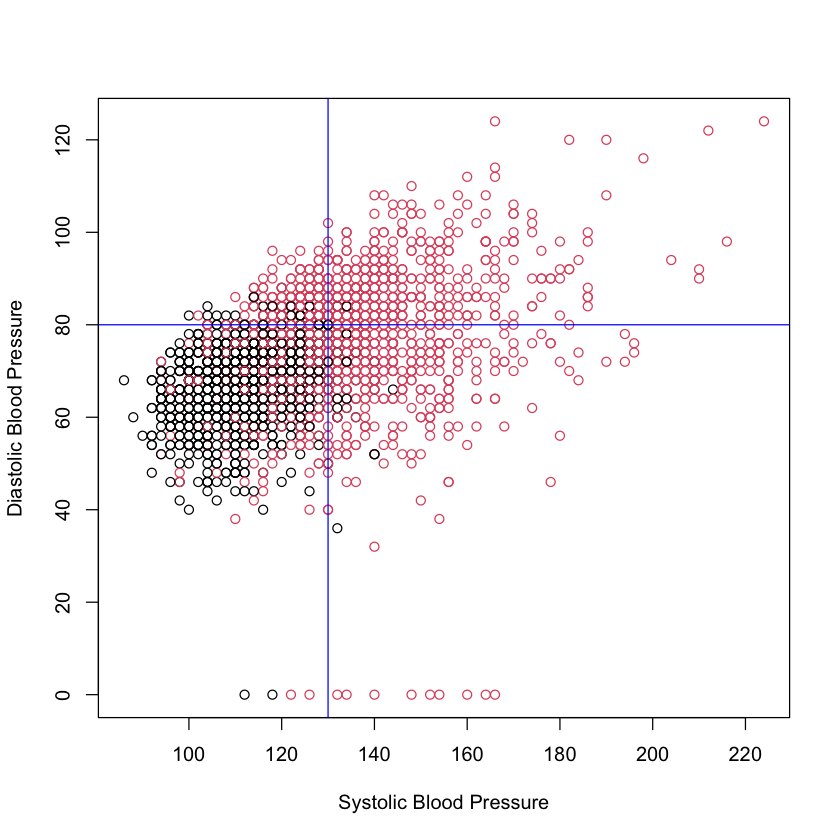

In [20]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col=as.factor(nhanes_df$HYP), 
     xlab="Systolic Blood Pressure",
     ylab="Diastolic Blood Pressure")
abline(v=130, col="blue")
abline(h=80, col="blue")

### Practice Question

TODO:

## Autogenerated Plots

Above, we learned some new functions for visualizing the relationship between variables. The `GGally` package contains some useful functions for looking at multiple univariate and bivariate relationships at the same time. The `ggpairs()` function takes the data as its first argument. By default, it will plot the pairwise distributions for all columns, but we can also specify to only select a subset of columns using the `columns` argument. You can see below that it plots the box plots and density plots for each univariate sample distribution. It then plots the bivariate distributions and calculates the Pearson correlation for all pairs of continuous variables. That's a lot of information!

TODO: messages, check Pearson?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


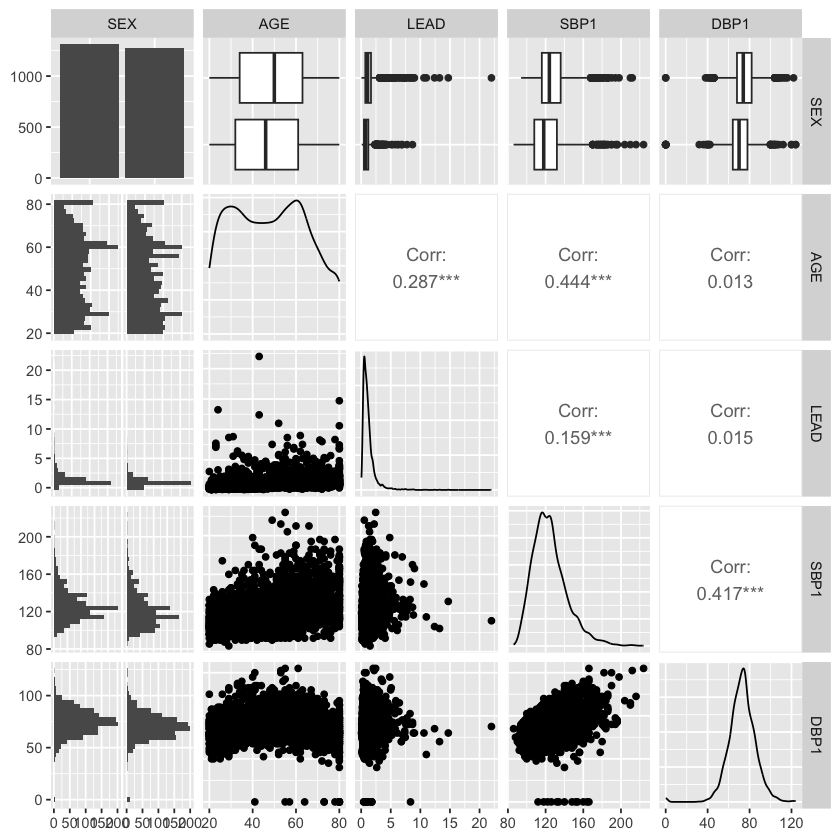

In [21]:
ggpairs(nhanes_df, columns = c("SEX", "AGE", "LEAD", "SBP1", "DBP1"))

Another useful function in this package is the `ggcorr()` function. In this function, it expects us to pass in a data frame with only numeric columns and it displays the correlation between all pairs where the color of each grid cell indicates the strength of the correlation. The additional argument `label=TRUE` specifies to put the correlation value on each grid cell. This is a useful way to identify pairs of strongly correlated variables. 

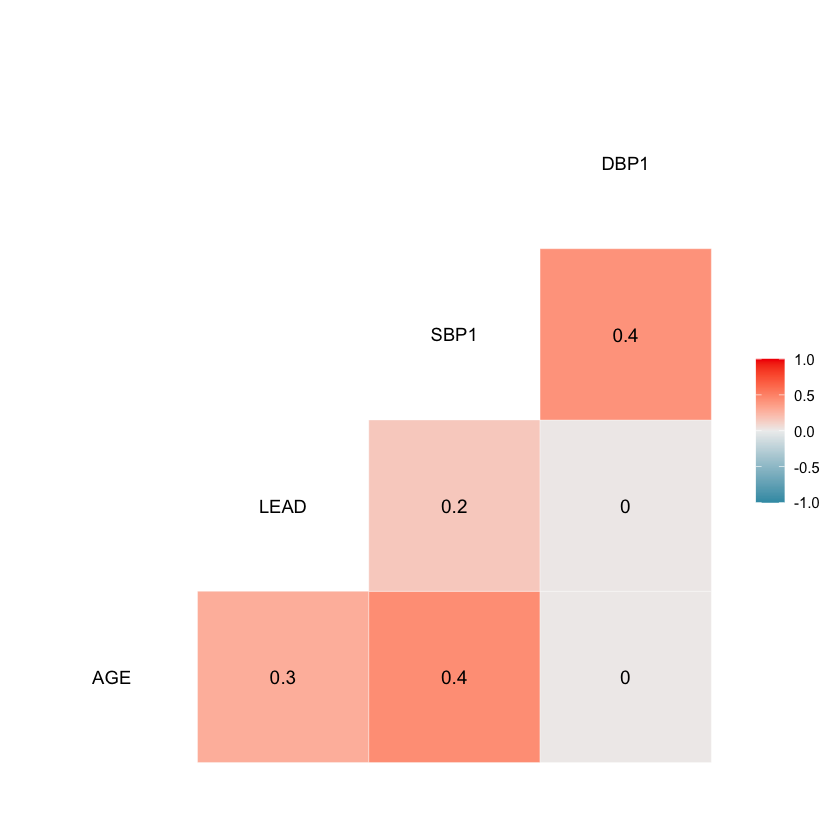

In [22]:
nhanes_cont <- nhanes_df[,c("AGE", "LEAD", "SBP1", "DBP1")]
ggcorr(nhanes_cont, label=TRUE)

## Tables

Another useful way to display information about your data is through tables. For example, it is standard practice in articles to have the first table in the paper give information about the study sample such as the mean and standard deviation for all continuous variables and the proportions for categorical variables. The `gt` package is designed to create beautiful tables that can include footnotes, titles, column labels, etc. The `gtsummary` package is an extension of this package that can create summary tables. We will focus on the latter and come back to the capabilities of `gt` in Chapter X.

TODO: update chapter ref

To start, we create a gt object using the first six rows of our data using the `gt()` function. In R Markdown, this would be knit as a table. Since we are using this within a Jupyter notebook, we need to pass this to another function to make sure it displays correctly as HTML. The pipe operator `%>%` passes the result on the left hand side as the first argument to the function on the right hand side. You can see the difference in the formatting.

In [23]:
gt(head(nhanes_df)) %>% gt:::as.tags.gt_tbl()

ID,AGE,SEX,RACE,EDUCATION,INCOME,SMOKE,YEAR,LEAD,BMI_CAT,LEAD_QUANTILE,HYP,ALC,DBP1,SBP1,EVER_SMOKE
93711,56,Male,Other Race,MoreThanHS,5.00,NeverSmoke,2017,2.15,BMI<=25,Q3,0,Yes,68,108,No
93713,67,Male,Non-Hispanic White,HS,2.65,StillSmoke,2017,3.71,BMI<=25,Q4,0,Yes,70,104,Yes
93716,61,Male,Other Race,MoreThanHS,5.00,QuitSmoke,2017,1.99,BMI>=30,Q3,0,Yes,72,120,Yes
93717,22,Male,Non-Hispanic White,HS,1.49,StillSmoke,2017,1.93,BMI<=25,Q3,0,Yes,62,116,Yes
93721,60,Female,Mexican American,LessThanHS,3.04,NeverSmoke,2017,0.75,BMI>=30,Q1,1,Yes,68,132,No
93722,60,Female,Non-Hispanic White,MoreThanHS,2.07,NeverSmoke,2017,0.98,BMI<=25,Q2,0,Yes,68,116,No


We now show how to use the `tbl_summary()` function in the `gtsummary` package. The first argument to this function is the data frame again. By default, this function will summarize all the variables in the data. Instead, we use the `include` argument to specify a list of variables to include. We this pipe this result to `as_gt()` which creates a gt table from the summary output before passing to the last function again to display the HTML table. Note that the table computes the total number of observations and computes the proportions for categorical variables and the interquartile range for continuous variables.

In [24]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

We can update some of the arguments to update our table. This time we specify that we want to stratify our table by the hypertension status, which summarizes the data by this grouping. Additionally, we change how continuous variables are summarized by specifying that we want to report the mean and standard deviation.

In [25]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP"),
           by = "HYP", statistic = list(all_continuous() ~ "{mean} ({sd})")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

## Exercises

For these exercises, we will be using the **NHANES** data.

1. Using the numerical and graphical summaries, describe the distribution of diastolic blood pressure `dbp` and `age` among study participants, respectively. 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   64.00   72.00   70.93   78.00  134.00    1877 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   34.00   48.00   49.18   63.00   85.00 

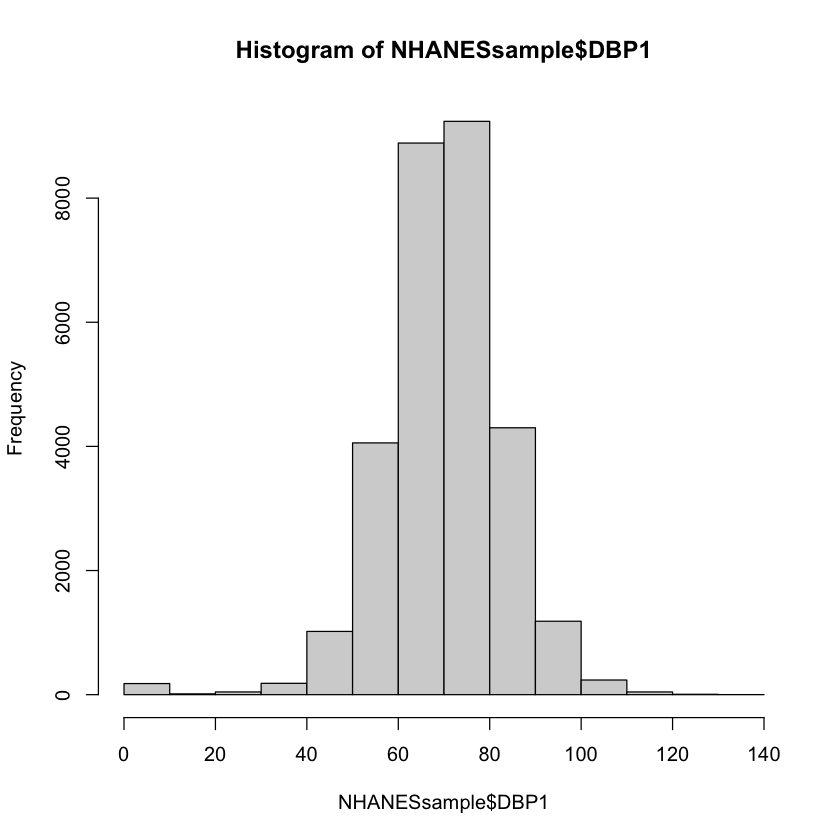

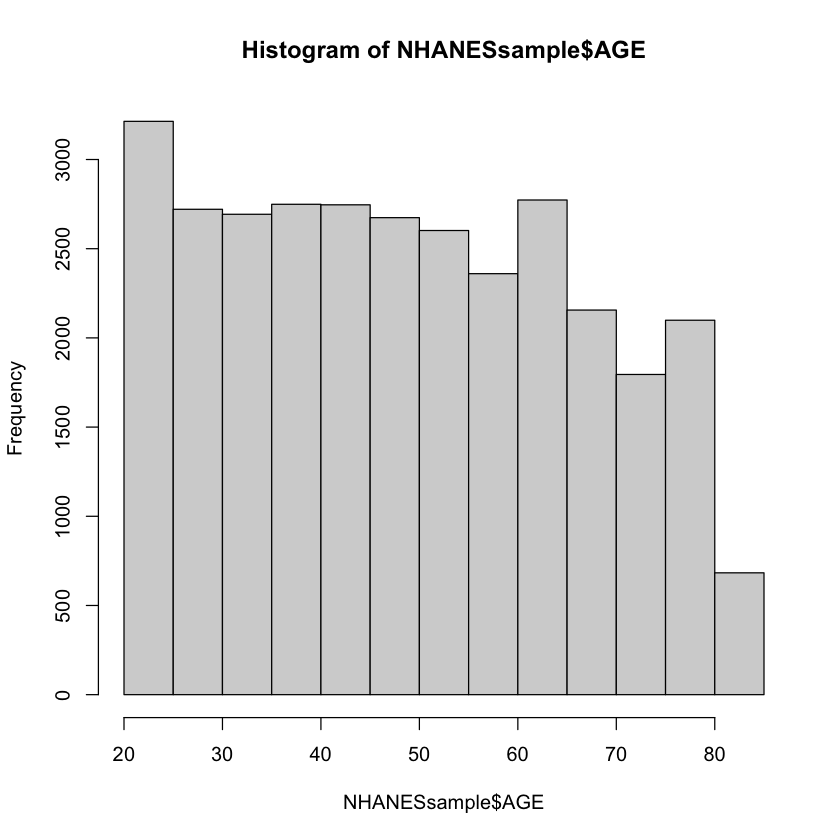

In [26]:
## solutions:
library(RforHDSdata)
data(NHANESsample)

# bbp
summary(NHANESsample$DBP1)
hist(NHANESsample$DBP1)

# age
summary(NHANESsample$AGE)
hist(NHANESsample$AGE)

2. Subset 20-to-55-year-old females and randomly select 1000 participants from the entire dataset. Using the random sample, `nhanes.samp`, explore how does blood pressure vary by age? Is there a remarkable trend in blood pressure between those females? 


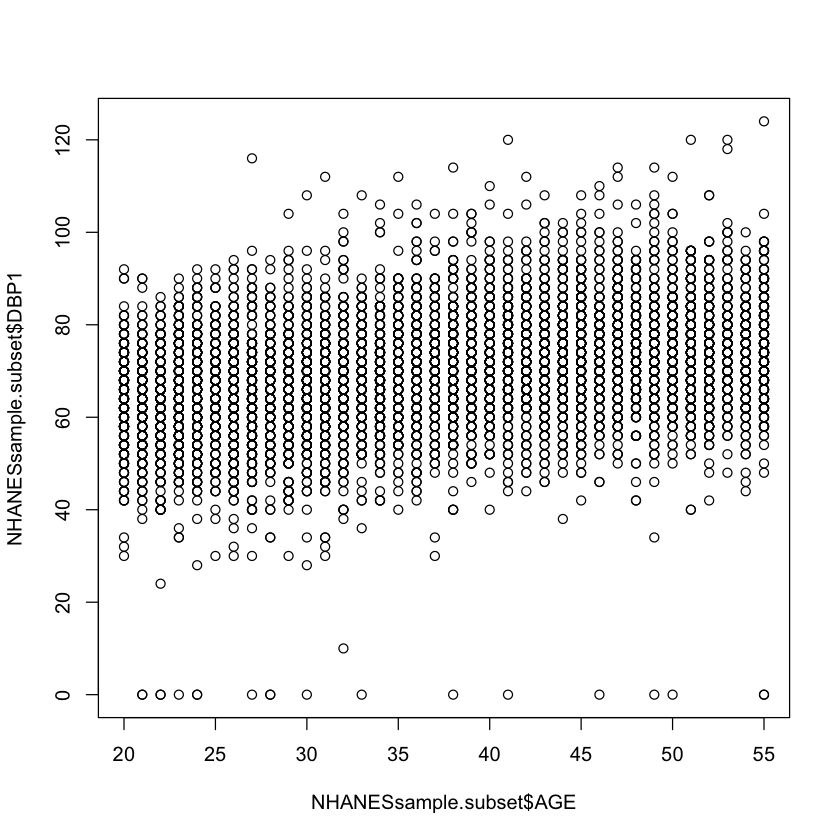

In [27]:
NHANESsample.subset <- subset(NHANESsample, 
                              NHANESsample$SEX=="Female" & NHANESsample$AGE>=20 & NHANESsample$AGE<=55)
plot(NHANESsample.subset$AGE, NHANESsample.subset$DBP1)

3. Repeat exercise 2 for males.

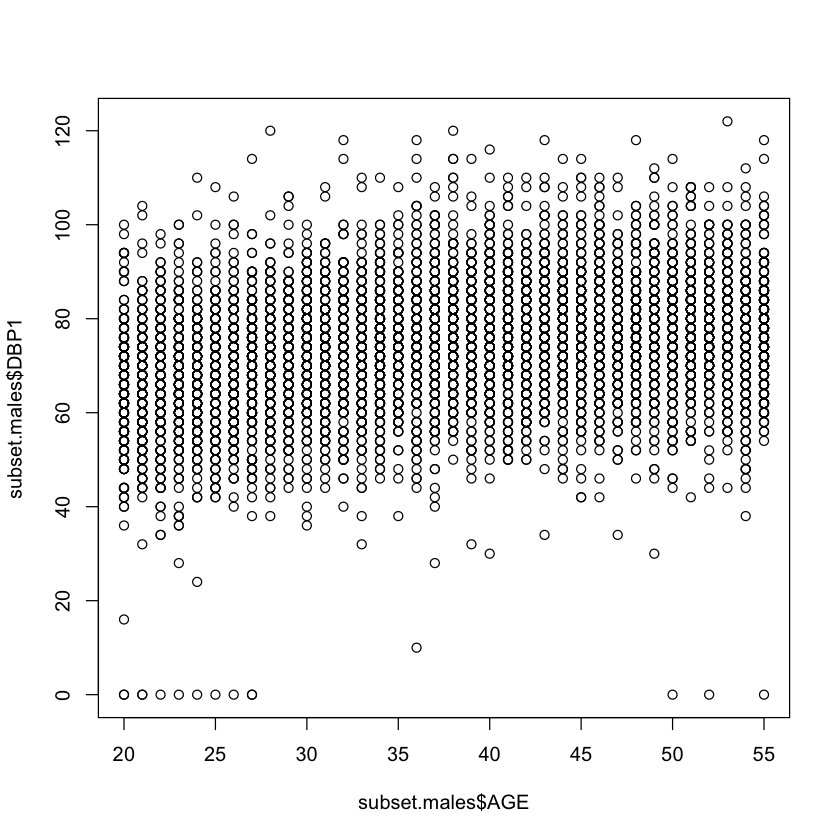

In [28]:
subset.males <- subset(NHANESsample, 
                              NHANESsample$SEX=="Male" & NHANESsample$AGE>=20 & NHANESsample$AGE<=55)
plot(subset.males$AGE, subset.males$DBP1)

4. For males between the ages of 50-59, compare blood pressure across race as reported in the race variable. Order resulting tables from lowest to highest average blood pressure.

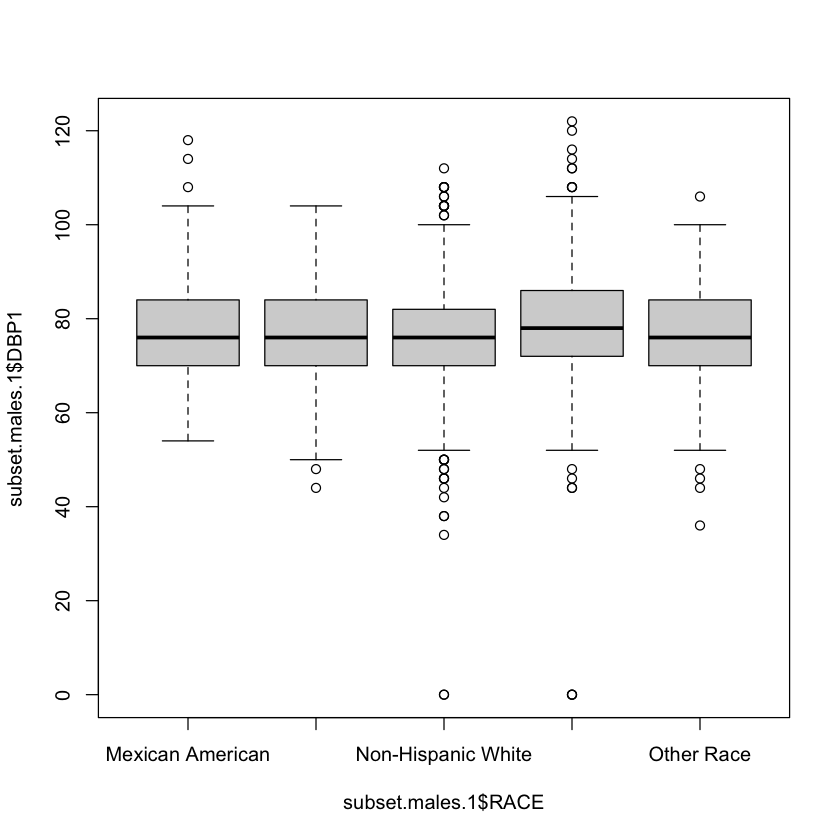

In [29]:
subset.males.1 <- subset(NHANESsample, 
                         NHANESsample$SEX=="Male" & NHANESsample$AGE>=50 & NHANESsample$AGE<=59)
subset.males.1$RACE <- as.factor(subset.males.1$RACE)
boxplot(subset.males.1$DBP1 ~ subset.males.1$RACE)

#levels(subset.males.1$race)
#summary(subset.males.1$dbp[subset.males.1$race=="Non-Hispanic White"])[4]
#summary(subset.males.1$dbp[subset.males.1$race=="Mexican American"])[4]
#summary(subset.males.1$dbp[subset.males.1$race=="Other Race" ])[4]
#summary(subset.males.1$dbp[subset.males.1$race=="Other Hispanic"])[4]
#summary(subset.males.1$dbp[subset.males.1$race=="Non-Hispanic Black"])[4]

5. Examine the relationship between blood pressure, age, and income using appropriate correlation matrices and probability.


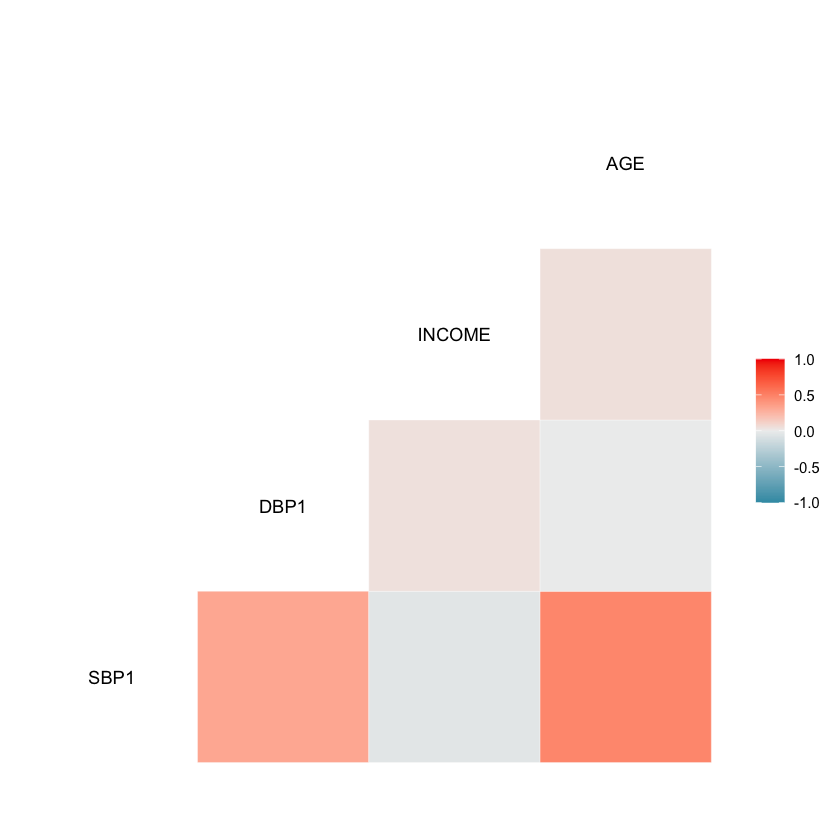

In [30]:
ggcorr(NHANESsample[,c("SBP1", "DBP1", "INCOME", "AGE")])